In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

In [ ]:
try:
    client = bigquery.Client(project='big-sales-data-453023')
    query = """
        SELECT * FROM `big-sales-data-453023.sales_data.sales`;
    """
    data = client.query(query).to_dataframe()
except Exception as e:
    print("Error: Unable to connect to BigQuery")
    data = pd.read_csv('../data/processed_data.csv', header=0)

/Users/siddharthgoradia/Documents/Loblaw-Data-Science/.venv/lib/python3.13/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [3]:
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')
data['month'] = data['order_date'].dt.month
data['hour'] = data['order_date'].dt.hour
data['total_sales'] = data['quantity_ordered'] * data['price_each']

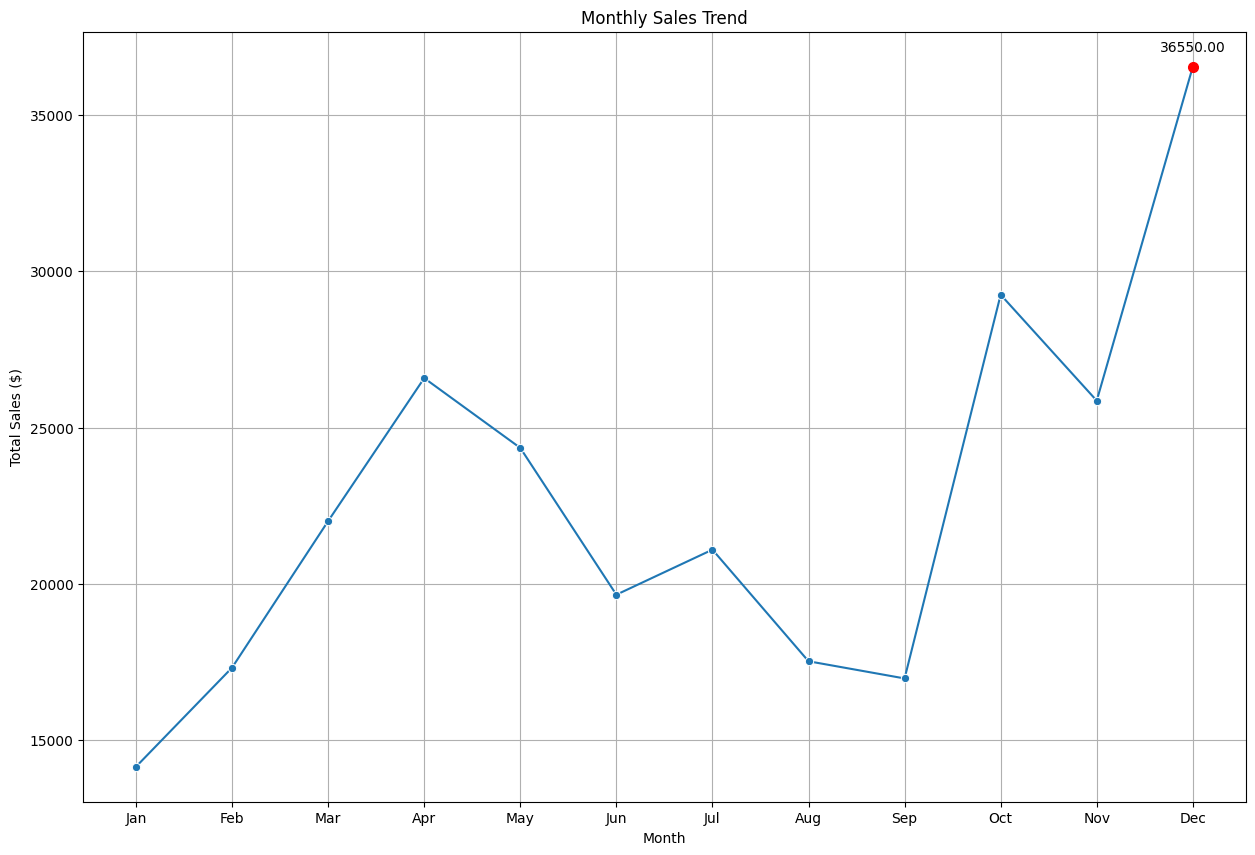

In [4]:
monthly_sales = data.groupby('month')['total_sales'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.lineplot(x=monthly_sales['month'], y=monthly_sales['total_sales'], marker='o')
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Trend")
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)
max_sales_idx = monthly_sales['total_sales'].idxmax()
max_sales_value = monthly_sales['total_sales'].max()
max_sales_month = month_names[max_sales_idx]
plt.plot(max_sales_idx + 1, max_sales_value, marker='o', markersize=7, color='red')
plt.annotate(f'{max_sales_value:.2f}', 
             xy=(max_sales_idx + 1, max_sales_value), 
             xytext=(max_sales_idx + 1, max_sales_value + 500),
             ha='center')

plt.grid()
plt.show()


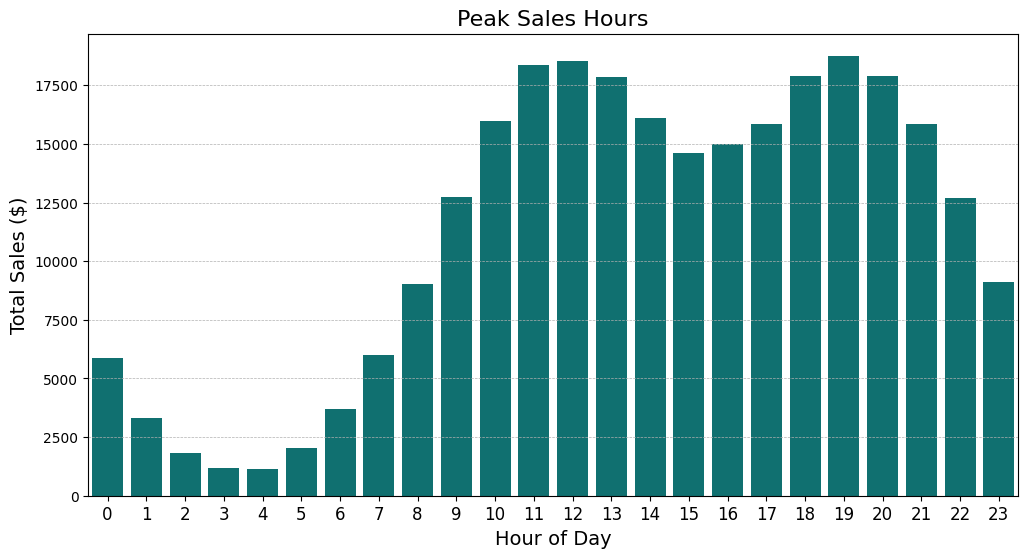

In [5]:
hourly_sales = data.groupby('hour')['total_sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x=hourly_sales['hour'], y=hourly_sales['total_sales'], color='teal')
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Total Sales ($)", fontsize=14)
plt.title("Peak Sales Hours", fontsize=16)
plt.xticks(range(0, 24), fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()


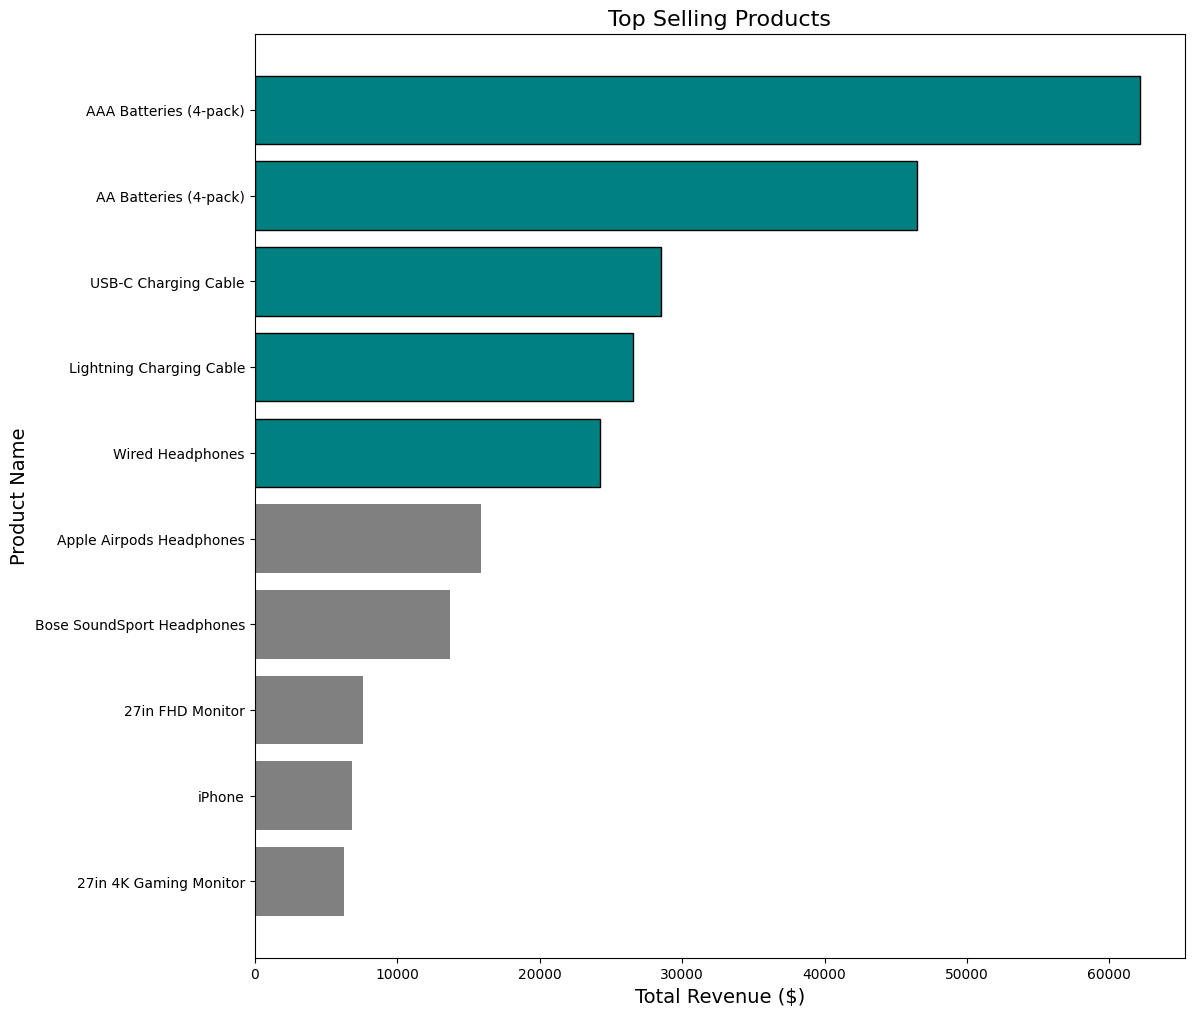

Top 5 Products with Highest Revenue:
AAA Batteries (4-pack): $62172.00
AA Batteries (4-pack): $46503.00
USB-C Charging Cable: $28493.00
Lightning Charging Cable: $26523.00
Wired Headphones: $24208.00


In [6]:
top_products = data.groupby('product').agg({
    'quantity_ordered': 'sum',
    'total_sales': 'sum'
}).reset_index().sort_values(by='total_sales', ascending=False).head(10)
top_5_products = top_products.head(5)
plt.figure(figsize=(12,12))
sns.barplot(y=top_products['product'], x=top_products['total_sales'], color='gray')
for i in range(5):
    plt.barh(top_products['product'].iloc[i], top_products['total_sales'].iloc[i], color='teal', edgecolor='black', height=0.8)

plt.xlabel("Total Revenue ($)", fontsize=14)
plt.ylabel("Product Name", fontsize=14)
plt.title("Top Selling Products", fontsize=16)
for i in range(5):
    revenue = top_products['total_sales'].iloc[i]
    product_name = top_products['product'].iloc[i]
plt.show()
print("Top 5 Products with Highest Revenue:")
for i in range(5):
    product_name = top_products['product'].iloc[i]
    revenue = top_products['total_sales'].iloc[i]
    print(f"{product_name}: ${revenue:.2f}")
